In [1]:
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.datasets import cifar10

import tensorflow as tf
import numpy
from keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
from PIL import Image


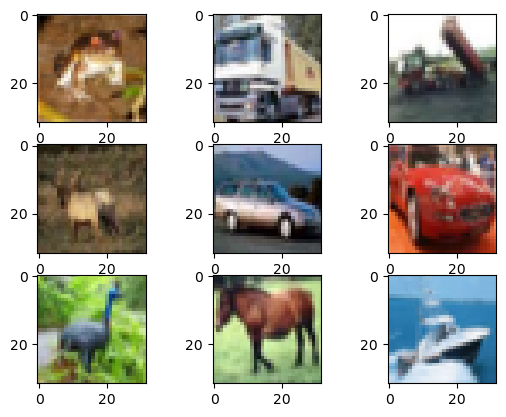

In [2]:
# cargar y observar algunas insancias de CIFAR10 

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# crear un grid de imágenes de 3x3
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(Image.fromarray(X_train[i]))
# visualizar
plt.show()

In [3]:
# Modlelo CNN para clasificar el dataset CIFAR-10 
# fijar la semilla del generador random para reproducibilidad
seed = 7
numpy.random.seed(seed)

In [4]:
# cargar el dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test.shape

(10000, 32, 32, 3)

In [7]:
# Voy a utilizar una pequeña fracción para training y testing
X_train_small = X_train [0:10000]
y_train_small = y_train [0:10000]

X_test_small = X_test [0:2500]
y_test_small = y_test [0:2500]

In [8]:
# normalizar las imágenes de 0-255 a 0.0-1.0
X_train_small = X_train_small.astype('float32')
X_test_small = X_test_small.astype('float32')
X_train_small = X_train_small / 255.0
X_test_small = X_test_small / 255.0

In [9]:
# codificar one-hot los labels
y_train_small = to_categorical(y_train_small)
y_test_small = to_categorical(y_test_small)
num_classes = y_test_small.shape[1]

kernel_constraint=maxnorm(3) es una forma de regularización, para controlar el overfitting, es restringir la matriz de pesos directamente con un término de regularización L2, el cual penaliza los pesos altos en la función de costo. Con esta restricción, se regulariza directamente los pesos
En maxnorm (m), si L2 excede m, escalará toda la matriz de pesos por un factor que reduce la norma a m

In [10]:
# Crear el modelo
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=max_norm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=max_norm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
# resumen del modelo
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,210,090 (16.06 MB)

 Trainable params: 4,210,090 (16.06 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compilar el modelo
epochs = 20
lrate = 0.01
decay = lrate/epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, nesterov=False)

model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
#model.summary()

In [13]:
# Entrenar el modelo
history = model.fit(X_train_small, y_train_small, validation_data=(X_test_small, y_test_small), epochs=epochs, batch_size=32)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.2464 - loss: 2.0488 - val_accuracy: 0.3064 - val_loss: 1.9272
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.3450 - loss: 1.8272 - val_accuracy: 0.4168 - val_loss: 1.7101
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 37ms/step - accuracy: 0.3934 - loss: 1.6900 - val_accuracy: 0.4220 - val_loss: 1.6220
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.4305 - loss: 1.5706 - val_accuracy: 0.4408 - val_loss: 1.5279
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.4712 - loss: 1.4570 - val_accuracy: 0.4676 - val_loss: 1.4699
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5092 - loss: 1.3642 - val_accuracy: 0.4496 - val_loss: 1.5240
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5469 - loss: 1.2619 - val_accuracy: 0.5324 - val_loss: 1.3332
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.5865 - loss: 1.1638 - 

In [14]:
# Evaluación del modelo y guardar imagen de su arquitectura
scores = model.evaluate(X_test_small, y_test_small, verbose=0)
print("Precisión: %.2f%%" % (scores[1]*100))
plot_model(model, show_shapes=True, to_file='cnn_cifar10.png')

Precisión: 57.64%
You must install pydot (`pip install pydot`) for `plot_model` to work.


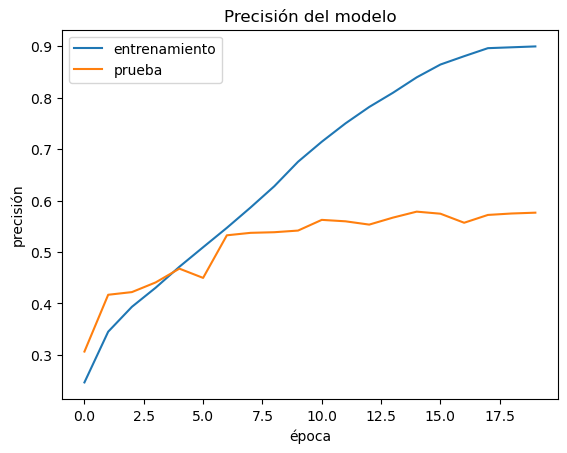

In [15]:
# Resumen histórico de la precisión
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('precisión')
plt.xlabel('época')
plt.legend(['entrenamiento','prueba'], loc= 'upper left')
plt.show()

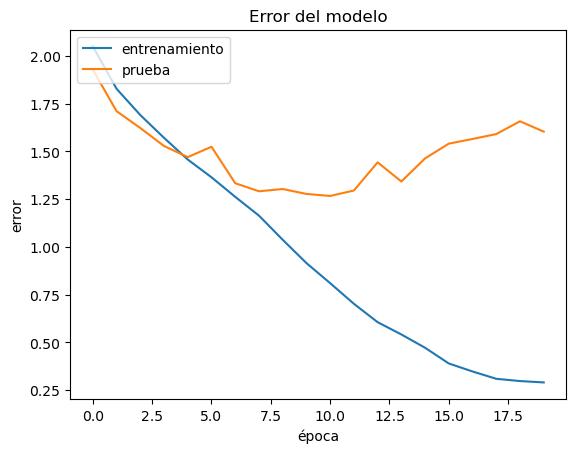

In [16]:
# Resumen histórico del error
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Error del modelo')
plt.ylabel('error')
plt.xlabel('época')
plt.legend(['entrenamiento','prueba'], loc= 'upper left')
plt.show()                                                                                           

In [17]:
from tensorflow.keras.utils import to_categorical
predictions=model.predict(numpy.reshape(X_test[1], (1,32,32,3)))
scores = model.evaluate(X_train_small / 255.0, to_categorical(y_test))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.1000 - loss: 6.1049 
